In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv("data/BATADAL_dataset03.csv")
valid_data = pd.read_csv("data/BATADAL_dataset04.csv")
test_data = pd.read_csv("data/BATADAL_test_dataset.csv")

In [3]:
train_data["DATETIME"] = pd.to_datetime(train_data.DATETIME)
valid_data["DATETIME"] = pd.to_datetime(valid_data.DATETIME)
test_data["DATETIME"] = pd.to_datetime(test_data.DATETIME)

In [30]:
train_data.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [31]:
valid_data.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [54]:
valid_data.ATT_FLAG.value_counts()

-999    3958
 1       219
Name: ATT_FLAG, dtype: int64

In [13]:
# remove leading space in the columns
valid_data.columns = valid_data.columns.str.strip()

In [56]:
X_train = train_data[set(train_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
X_valid = valid_data[set(valid_data.columns)-{"ATT_FLAG", "DATETIME"}].to_numpy()
y_valid = valid_data["ATT_FLAG"].to_numpy()
# convert to 1s for attack and 0s for normal
y_valid = y_valid == 1
# X_test = test_data[set(test_data.columns)-{"ATT_FLAG"}]
# y_test = test_data["ATT_FLAG"]

In [57]:
X_train.shape

(8761, 43)

In [58]:
X_valid.shape

(4177, 43)

In [59]:
from sklearn.neighbors import LocalOutlierFactor

In [60]:
from sklearn.metrics import confusion_matrix

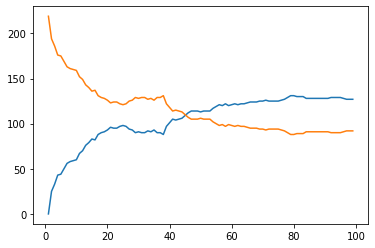

In [69]:
lofs = []
nns = [i for i in range(1, 100)]
tps = []
fns = []
for nn in nns:
    clf = LocalOutlierFactor(n_neighbors=nn, algorithm='kd_tree', leaf_size=100,
                             metric='minkowski', p=1, contamination='auto', novelty=True, n_jobs=-1)
    clf.fit(X_valid)
    lof = clf.negative_outlier_factor_
#     sns.distplot(lof)
#     plt.show()
    y_pred = clf.predict(X_valid)
    y_pred = y_pred == -1
    
    y_pred = y_pred.astype(int)
#     print(pd.Series(y_pred).value_counts())
#     print(pd.Series(y_valid).value_counts())
#     print(confusion_matrix(y_valid, y_pred).ravel())
    tn, fp, fn, tp = confusion_matrix(y_valid, y_pred).ravel()
    tps.append(tp)
    fns.append(fn)
#     print(correct_predictions)
sns.lineplot(x=nns, y=tps)
sns.lineplot(x=nns, y=fns)